In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import pandas as pd
import string
import io
from sklearn import preprocessing
import operator
import numpy as np; np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import string
import operator
from scipy.stats import pearsonr
from scipy.stats import bartlett
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from scipy.stats import kendalltau, spearmanr
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression, make_circles

import statsmodels.stats.multicomp as multi 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split 

In [2]:
# Importation de dataset

In [3]:
data= pd.read_csv('C:/Users/cheit/Desktop/r studio/diamonds.csv')

In [4]:
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
# Analyse

In [6]:
df = data.copy()

In [7]:
df.shape

(53940, 11)

In [8]:
df.dtypes # les types de variable

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

<AxesSubplot:ylabel='None'>

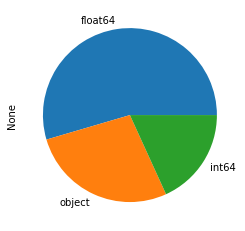

In [9]:
df.dtypes.value_counts().plot.pie() # la proportion des differe

In [10]:
df.isna

<bound method DataFrame.isna of        Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

       

<Figure size 432x288 with 0 Axes>

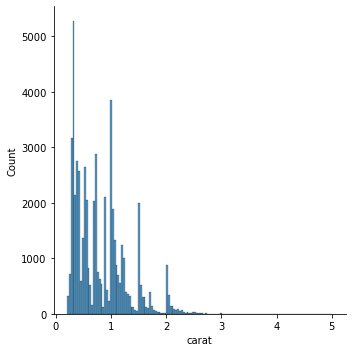

<Figure size 432x288 with 0 Axes>

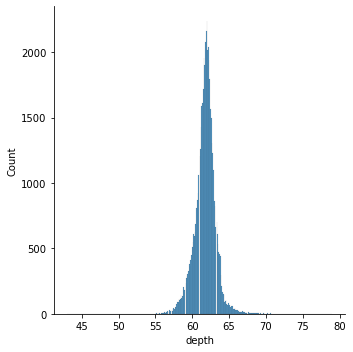

<Figure size 432x288 with 0 Axes>

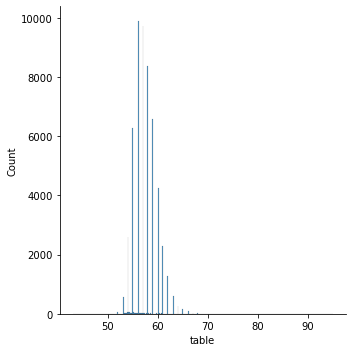

<Figure size 432x288 with 0 Axes>

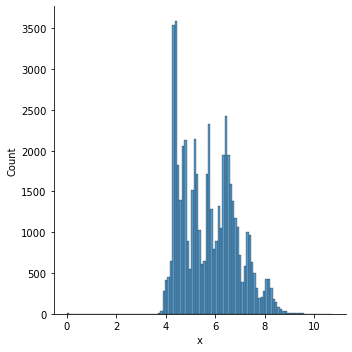

<Figure size 432x288 with 0 Axes>

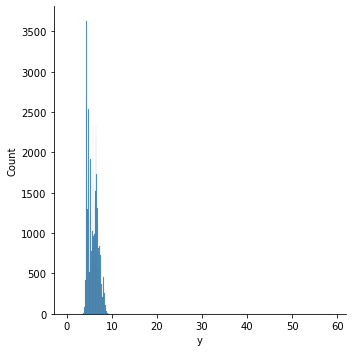

<Figure size 432x288 with 0 Axes>

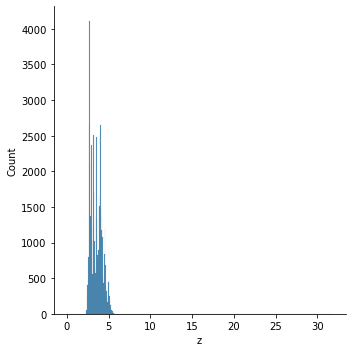

In [11]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.displot(df[col]) 

<Figure size 432x288 with 0 Axes>

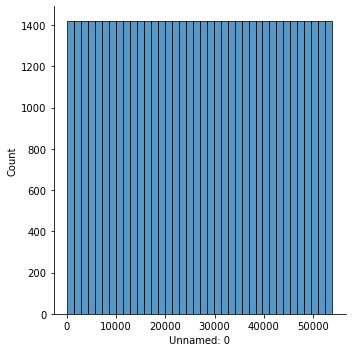

<Figure size 432x288 with 0 Axes>

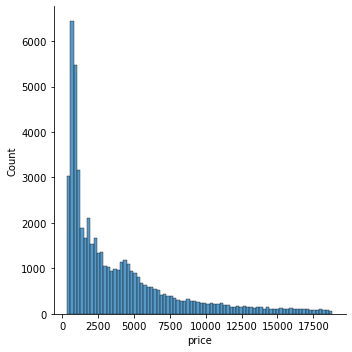

In [12]:
for col in df.select_dtypes('int64'):
    plt.figure()
    sns.displot(df[col])

In [13]:
#Voir le nom de chaque variables
for idx,column in enumerate(df.columns):
     print(idx,column)

0 Unnamed: 0
1 carat
2 cut
3 color
4 clarity
5 depth
6 table
7 price
8 x
9 y
10 z


In [14]:
# Calcul des corrélation
numeric_data = df.select_dtypes(include=[np.number])

<AxesSubplot:>

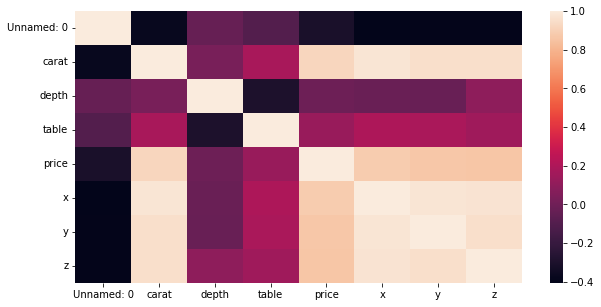

In [15]:
# tableau de corrélation
corr = numeric_data.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr)

In [16]:
print (corr['price'].sort_values(ascending=False)[:20]) #

price         1.000000
carat         0.921591
x             0.884435
y             0.865421
z             0.861249
table         0.127134
depth        -0.010647
Unnamed: 0   -0.306873
Name: price, dtype: float64


In [17]:
# Nouveau dataset numérique avec la selection des 10 variables numeriques qui ont la plus fortes corelations par rapport à SalePrice
newDataNum= df[['price','carat', 'x', 'y', 'z', 'table']]
newDataNum.head()

,price,carat,x,y,z,table
0,326,0.23,3.95,3.98,2.43,55.0
1,326,0.21,3.89,3.84,2.31,61.0
2,327,0.23,4.05,4.07,2.31,65.0
3,334,0.29,4.20,4.23,2.63,58.0
4,335,0.31,4.34,4.35,2.75,58.0


In [18]:
# réindexer le dataframe numérique
newDataNum.reset_index(level=None, drop=False, inplace=False, col_level=0)

,index,price,carat,x,y,z,table
0,0,326,0.23,3.95,3.98,2.43,55.0
1,1,326,0.21,3.89,3.84,2.31,61.0
2,2,327,0.23,4.05,4.07,2.31,65.0
3,3,334,0.29,4.20,4.23,2.63,58.0
4,4,335,0.31,4.34,4.35,2.75,58.0
...,...,...,...,...,...,...,...
53935,53935,2757,0.72,5.75,5.76,3.50,57.0
53936,53936,2757,0.72,5.69,5.75,3.61,55.0
53937,53937,2757,0.70,5.66,5.68,3.56,60.0
53938,53938,2757,0.86,6.15,6.12,3.74,58.0


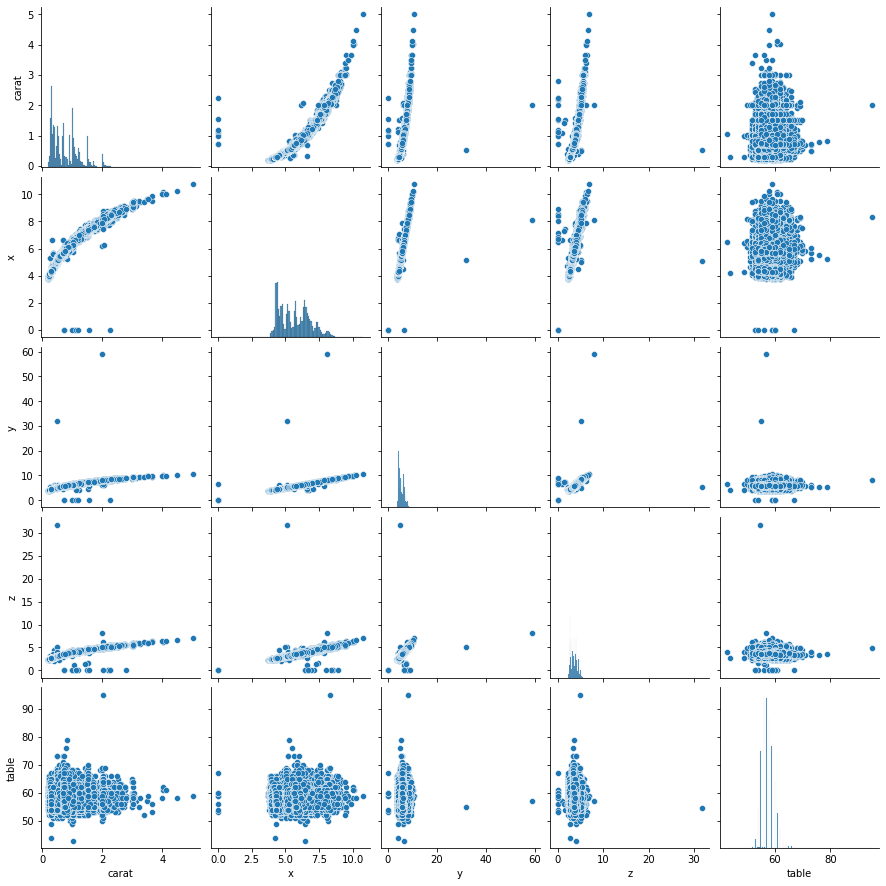

In [19]:
sns.pairplot(newDataNum.iloc[:,1:12])

In [20]:
# Nombre des données manquantes par colonne
non_empty_headers = []
for col in newDataNum.columns.values:
    print("COL: " + str(col))
    total_rows = len(df[col])
    print("TOTAL LIGNES: " + str(total_rows))
    empty_rows_sum = newDataNum[col].isnull().sum()
    print("TOTAL LIGNES VIDE: " + str(empty_rows_sum))
    total_values = total_rows - empty_rows_sum
    print("TOTAL LIGNES NON-VIDES: " + str(total_values))
    print("--------------------------")
    if total_values > 1:
        col_name = str(col).strip()
        non_empty_headers.append(col)

stripped_data = newDataNum[non_empty_headers]

COL: price
TOTAL LIGNES: 53940
TOTAL LIGNES VIDE: 0
TOTAL LIGNES NON-VIDES: 53940
--------------------------
COL: carat
TOTAL LIGNES: 53940
TOTAL LIGNES VIDE: 0
TOTAL LIGNES NON-VIDES: 53940
--------------------------
COL: x
TOTAL LIGNES: 53940
TOTAL LIGNES VIDE: 0
TOTAL LIGNES NON-VIDES: 53940
--------------------------
COL: y
TOTAL LIGNES: 53940
TOTAL LIGNES VIDE: 0
TOTAL LIGNES NON-VIDES: 53940
--------------------------
COL: z
TOTAL LIGNES: 53940
TOTAL LIGNES VIDE: 0
TOTAL LIGNES NON-VIDES: 53940
--------------------------
COL: table
TOTAL LIGNES: 53940
TOTAL LIGNES VIDE: 0
TOTAL LIGNES NON-VIDES: 53940
--------------------------


In [21]:
# traitement des données catégoriques
cat_data = df.select_dtypes(exclude=[np.number])
print(cat_data)

             cut color clarity
0          Ideal     E     SI2
1        Premium     E     SI1
2           Good     E     VS1
3        Premium     I     VS2
4           Good     J     SI2
...          ...   ...     ...
53935      Ideal     D     SI1
53936       Good     D     SI1
53937  Very Good     D     SI1
53938    Premium     H     SI2
53939      Ideal     D     SI2

[53940 rows x 3 columns]


In [22]:
# transformarion des variables categorielles
le = preprocessing.LabelEncoder()
for i in cat_data:
  cat_data[i]= le.fit_transform(cat_data[i])

C:\Users\cheit\AppData\Local\Temp/ipykernel_3796/210139335.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[i]= le.fit_transform(cat_data[i])


In [23]:
cat_data.head

<bound method NDFrame.head of        cut  color  clarity
0        2      1        3
1        3      1        2
2        1      1        4
3        3      5        5
4        1      6        3
...    ...    ...      ...
53935    2      0        2
53936    1      0        2
53937    4      0        2
53938    3      4        3
53939    2      0        3

[53940 rows x 3 columns]>

In [24]:
trans = cat_data.reset_index(level=None, drop=False, inplace=False, col_level=0)
trans

,index,cut,color,clarity
0,0,2,1,3
1,1,3,1,2
2,2,1,1,4
3,3,3,5,5
4,4,1,6,3
...,...,...,...,...
53935,53935,2,0,2
53936,53936,1,0,2
53937,53937,4,0,2
53938,53938,3,4,3


In [25]:
# Ajout de Saleprice
p= df['price']
p

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [26]:
# Ajout saleprice dans le dataframe categoriel
frames = [p , trans]
NcatDdata = pd.concat(frames, axis=1 )
NcatDdata

,price,index,cut,color,clarity
0,326,0,2,1,3
1,326,1,3,1,2
2,327,2,1,1,4
3,334,3,3,5,5
4,335,4,1,6,3
...,...,...,...,...,...
53935,2757,53935,2,0,2
53936,2757,53936,1,0,2
53937,2757,53937,4,0,2
53938,2757,53938,3,4,3


<AxesSubplot:>

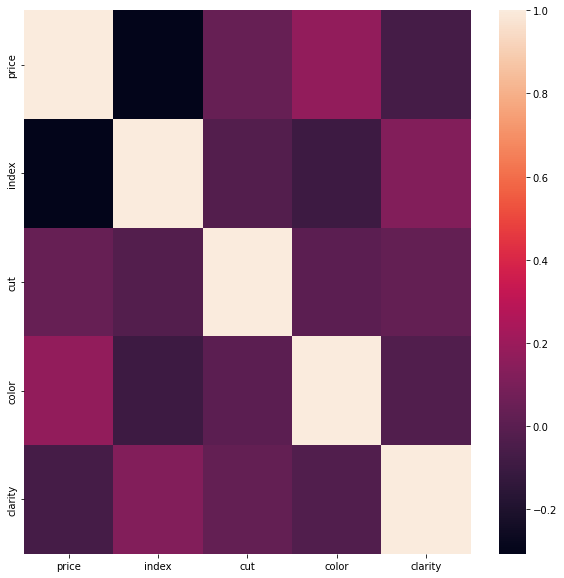

In [27]:
heat_map = NcatDdata.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(heat_map)

In [28]:
print (heat_map['price'].sort_values(ascending=False)[:20])

price      1.000000
color      0.172511
cut        0.039860
clarity   -0.071535
index     -0.306873
Name: price, dtype: float64


In [29]:
# création de dataset catégorielle final
newDCat=trans[['color', 'cut']]
newDCat.head()

,color,cut
0,1,2
1,1,3
2,1,1
3,5,3
4,6,1


In [30]:
# merge dataset num et cat
# Ajout saleprice dans le dataframe categoriel
frames = [newDataNum , newDCat]
DataFinal = pd.concat(frames, axis=1 )
DataFinal

,price,carat,x,y,z,table,color,cut
0,326,0.23,3.95,3.98,2.43,55.0,1,2
1,326,0.21,3.89,3.84,2.31,61.0,1,3
2,327,0.23,4.05,4.07,2.31,65.0,1,1
3,334,0.29,4.20,4.23,2.63,58.0,5,3
4,335,0.31,4.34,4.35,2.75,58.0,6,1
...,...,...,...,...,...,...,...,...
53935,2757,0.72,5.75,5.76,3.50,57.0,0,2
53936,2757,0.72,5.69,5.75,3.61,55.0,0,1
53937,2757,0.70,5.66,5.68,3.56,60.0,0,4
53938,2757,0.86,6.15,6.12,3.74,58.0,4,3


In [31]:
#normalization
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

# Normaliser les colonnes du DataFrame
df_normalized = scaler.fit_transform(DataFinal)

# Créer un nouveau DataFrame avec les données normalisées
df_normalized = pd.DataFrame(df_normalized, columns=DataFinal.columns)

# Afficher le DataFrame normalisé
print(df_normalized)

          price     carat         x         y         z     table     color  \
0      0.000000  0.006237  0.367784  0.067572  0.076415  0.230769  0.166667   
1      0.000000  0.002079  0.362197  0.065195  0.072642  0.346154  0.166667   
2      0.000054  0.006237  0.377095  0.069100  0.072642  0.423077  0.166667   
3      0.000433  0.018711  0.391061  0.071817  0.082704  0.288462  0.833333   
4      0.000487  0.022869  0.404097  0.073854  0.086478  0.288462  1.000000   
...         ...       ...       ...       ...       ...       ...       ...   
53935  0.131427  0.108108  0.535382  0.097793  0.110063  0.269231  0.000000   
53936  0.131427  0.108108  0.529795  0.097623  0.113522  0.230769  0.000000   
53937  0.131427  0.103950  0.527002  0.096435  0.111950  0.326923  0.000000   
53938  0.131427  0.137214  0.572626  0.103905  0.117610  0.288462  0.666667   
53939  0.131427  0.114345  0.542831  0.099660  0.114465  0.230769  0.000000   

        cut  
0      0.50  
1      0.75  
2      0.

In [33]:
# réindexation dataset
s= df_normalized.reset_index(level=None, drop=False, inplace=False, col_level=0)
s

,index,price,carat,x,y,z,table,color,cut
0,0,0.000000,0.006237,0.367784,0.067572,0.076415,0.230769,0.166667,0.50
1,1,0.000000,0.002079,0.362197,0.065195,0.072642,0.346154,0.166667,0.75
2,2,0.000054,0.006237,0.377095,0.069100,0.072642,0.423077,0.166667,0.25
3,3,0.000433,0.018711,0.391061,0.071817,0.082704,0.288462,0.833333,0.75
4,4,0.000487,0.022869,0.404097,0.073854,0.086478,0.288462,1.000000,0.25
...,...,...,...,...,...,...,...,...,...
53935,53935,0.131427,0.108108,0.535382,0.097793,0.110063,0.269231,0.000000,0.50
53936,53936,0.131427,0.108108,0.529795,0.097623,0.113522,0.230769,0.000000,0.25
53937,53937,0.131427,0.103950,0.527002,0.096435,0.111950,0.326923,0.000000,1.00
53938,53938,0.131427,0.137214,0.572626,0.103905,0.117610,0.288462,0.666667,0.75


In [34]:
### Modélisation lineaire

In [35]:
x = s.drop(['price', 'index'], axis=1)
y = s['price']

In [36]:
x_train, x_test,y_train , y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)


In [37]:
# normalisation
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [38]:
# construire le modele

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [39]:
# predict
y_pred = reg.predict(x_test)

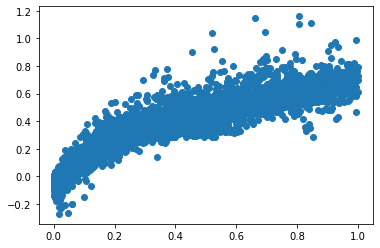

In [40]:
plt.scatter(y_test,y_pred )
plt.show()

In [45]:

from sklearn.metrics import mean_squared_error,r2_score

print("R2 Score: " +"{:.3}".format(r2_score(y_test, y_pred)));

R2 Score: 0.841


In [ ]:
### Random Forest

In [45]:
cible = np.array(s['price'])
#On supprime Happiness.Score du dataset
s= s.drop('price', axis = 1)
#On conserve les noms de variable à part
liste_variables = list(s.columns)
#On convertit le dataset en array
s = np.array(s)

In [46]:
x_train,x_test,y_train,y_test=train_test_split(s,cible,test_size=0.25, random_state=2020)

In [47]:
#On importe l'algorithme à partir de sklearn
from sklearn.ensemble import RandomForestRegressor
#On créé un Random Forest de 100 arbres 
rf = RandomForestRegressor(n_estimators = 100, random_state = 2020)
#Et on lance le training sur notre dataset de train
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=2020)

In [48]:
predictions = rf.predict(x_test)

In [49]:
#On applique le modèle que l'on vient 
#d'entraîner sur l'échantillon de test
predictions = rf.predict(x_test)

In [50]:
#On va calculer plusieurs erreurs entre la valeur prédite et le score de bonheur réel (que nous avions stocké dans y_test)
#     - MAE : Mean Asolute Error
#     - MAPE : Mean Absolute Percentage Error 
# MAE 
erreurs = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(erreurs), 2))

Mean Absolute Error: 0.0


In [51]:
# MAPE
mape = 100 * (erreurs / y_test)
print('Mean Absolute Percentage Error :', round(np.mean(mape), 2), '%.')

Mean Absolute Percentage Error : inf %.


C:\Users\cheit\AppData\Local\Temp/ipykernel_3796/3675059139.py:2: RuntimeWarning: divide by zero encountered in true_divide
  mape = 100 * (erreurs / y_test)


Text(0.5, 0, 'Relative Importance')

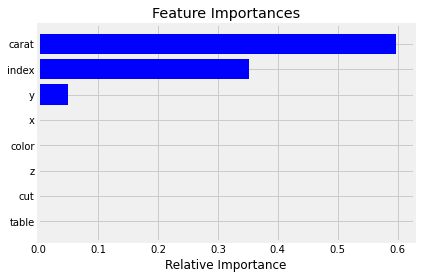

In [52]:
importances = rf.feature_importances_
indices = np.argsort(importances)
# style du graphique 
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [liste_variables[i] for i in indices])
plt.xlabel('Relative Importance')